# Figure 2

In [1]:
# Load Function Definitions 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 8}
matplotlib.rc('font', **font)

from thymmatu.graphics.pro_plot import barPlotter, curvePlotter

#  standards  #
#  standards WEIZMANN jupyter #
from standards import *

DataPath = "Data"
OutPath = "Graphs"

## Gene Distribution

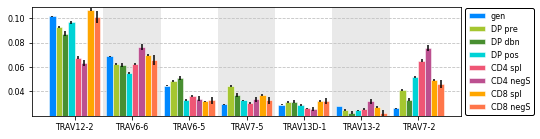

In [2]:
#  OPTIONS  #

GENE = "V"
n_choice = 7
figsize = ( n_choice * 1.1, 2 )

df = pd.read_csv(f'{DataPath}/CA-prod-{GENE}_usage.csv', index_col=0 )

columns = [c for c in df.columns if 'err' not in c]
errorbars = [ c + ' err' for c in columns ]
colors = [ EXP15_KOL[c] for c in columns ] 

df = df.iloc[np.arange(n_choice)]
ax = barPlotter( df, colors=colors, hatch=None, grid=True,
                columns=columns, figsize=figsize, errorbars=errorbars, rotation=0 )
plt.margins(0)
plt.legend(ncol=1, shadow=False, bbox_to_anchor=(1,.5), loc='center left',
            edgecolor='inherit', framealpha=1)

for i in np.arange( 1, ax.get_xlim()[1]-1, 2 ).astype(int) :
    ax.axvspan( i, i+1, 0, 1, alpha=0.5, color=GREYS_DIC['silver'], ec=None, zorder=-10)

plt.savefig( f"{OutPath}/fig2A.pdf", bbox_inches='tight' )
plt.show()

## Length Distribution

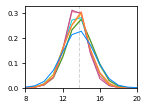

In [7]:
#  OPTIONS  #
 
figsize = ( 2, 1.5 )
df = pd.read_csv(f'{DataPath}/CA-prod-lengths.csv', index_col=0 )
    
columns =  HEADERS + ['gen']
errorbars = [c + ' err' for c in columns]
colors = [ EXP15_KOL[c] for c in columns ]
linestyle = ['-'] * len(HEADERS) + ['-']

ax = curvePlotter( df, colors=colors, grid=False, legend=False, linestyle=linestyle,
                  columns=columns, figsize=figsize, errorbars=None )

plt.margins(0)
ax.set_xlim([8, 20])
ax.set_ylim([0, np.max(df.values) * 1.05 ])

ax.set_xticks([8,12,16,20])

average_lengths = np.matmul( df.index.values, df[columns].values )
ax.axvline(x=average_lengths[0], zorder =-2, ls='--', lw=1, color=GREYS_DIC['silver'])

plt.savefig( f"{OutPath}/fig2B.pdf", bbox_inches='tight' )

plt.show()

### Show standard deviations

In [9]:
df[[c for c in df if 'err' not in c]].std()

gen         0.076350
DP pre      0.085956
DP dbn      0.085698
DP pos      0.089858
CD4 spl     0.096166
CD4 negS    0.096935
CD8 spl     0.090089
CD8 negS    0.091278
dtype: float64

## Pgen Distribution

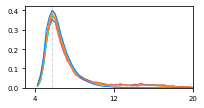

In [11]:
#  OPTIONS  #
 
df = pd.read_csv(f"{DataPath}/CA-prod-pgen_distr.csv", index_col=0 )
figsize = (3, 1.5)
columns = HEADERS + ['gen']
errorbars = [c + ' err' for c in columns]
colors = [ EXP15_KOL[c] for c in columns ]
linestyle = ['-'] * len(HEADERS) + ['-']

ax = curvePlotter( df, colors=colors, grid=False, legend=False, linestyle=linestyle,
                  columns=columns, figsize=figsize, errorbars=None )
plt.margins(0)

#ax.set_yscale('log')
ax.set_xlim([3, 20])
ax.set_ylim([0, np.max(df.values) * 1.05 ])
ax.set_xticks([4,12,20])

ax.axvline(x=df.index[df['gen'].argmax()], 
           zorder =-2, ls='--', lw=1, color=GREYS_DIC['silver'])

plt.savefig( f"{OutPath}/fig2C.pdf", bbox_inches='tight' )

plt.show()